In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [59]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [60]:
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [61]:
data.shape

(2111, 17)

In [62]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

No null values are present in the dataset. 

Also, it has been made clear in the original dataset documentation that NObeyesdad column is generally the BMI which is calculated using Height and Weight of the people, the Height and Weight columns can also be removed from the dataset.

In [64]:
data.describe(include = 'object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [65]:
for col in data.describe(include = 'object').columns:
    print(f"{col}: {data[col].unique()}")
    print("-"*100)

Gender: ['Female' 'Male']
----------------------------------------------------------------------------------------------------
family_history_with_overweight: ['yes' 'no']
----------------------------------------------------------------------------------------------------
FAVC: ['no' 'yes']
----------------------------------------------------------------------------------------------------
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------------------------------------------------------------------
SMOKE: ['no' 'yes']
----------------------------------------------------------------------------------------------------
SCC: ['no' 'yes']
----------------------------------------------------------------------------------------------------
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
----------------------------------------------------------------------------------------------------
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bi

In [66]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [67]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Data analysis and Visualization

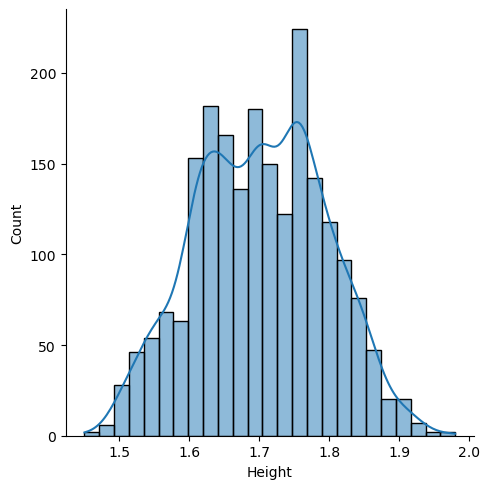

In [68]:
sns.displot(data['Height'], kde = True)

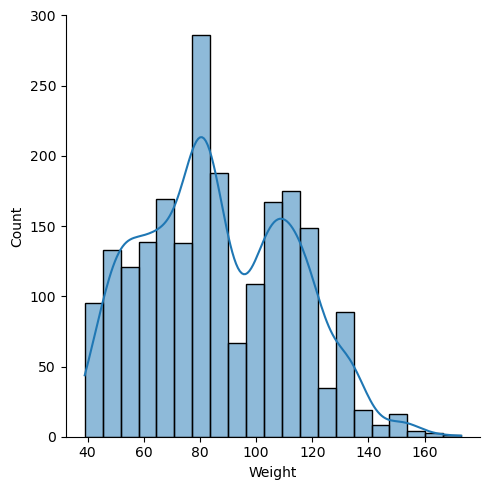

In [69]:
sns.displot(data["Weight"], kde = True)

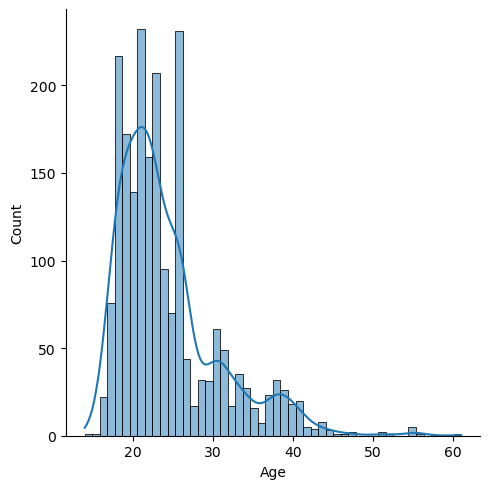

In [70]:
sns.displot(data['Age'], kde = True)

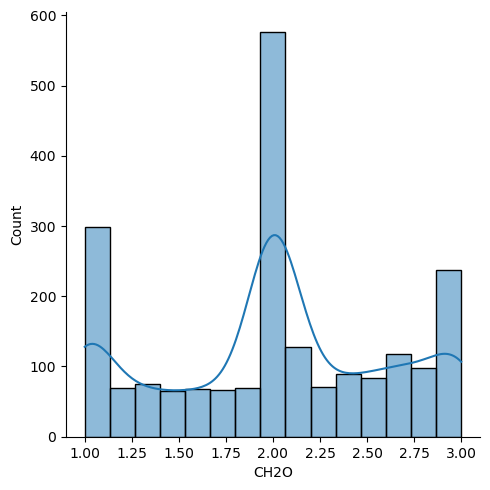

In [71]:
sns.displot(data.CH2O, kde= True)

In [72]:
data['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

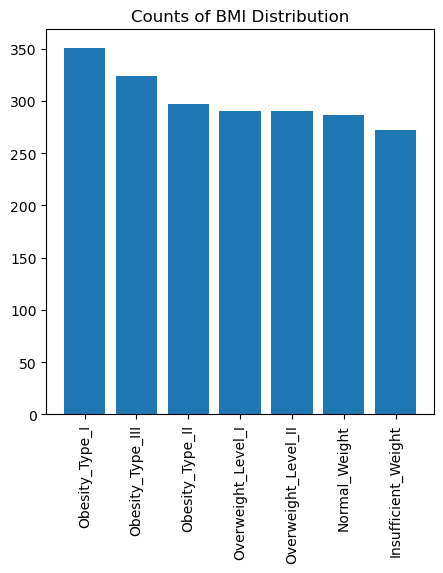

In [73]:
plt.figure(figsize = (5,5))
plt.title('Counts of BMI Distribution')
plt.bar(["Obesity_Type_I", "Obesity_Type_III", "Obesity_Type_II", "Overweight_Level_I", 
         "Overweight_Level_II", "Normal_Weight", "Insufficient_Weight"],
       data['NObeyesdad'].value_counts())
plt.xticks(rotation = 90)
plt.show()

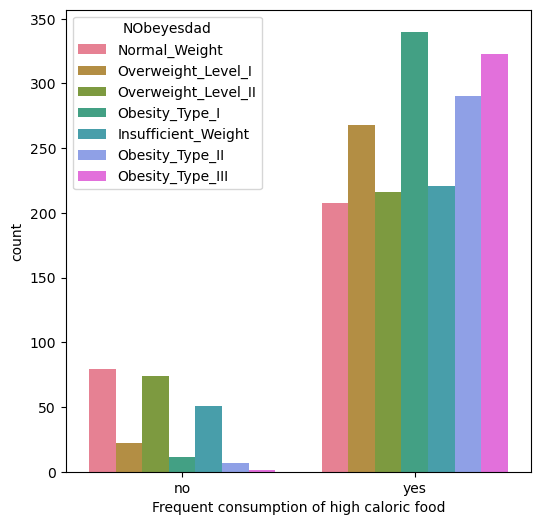

In [74]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'FAVC', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Frequent consumption of high caloric food")
plt.show()

The above barchart shows that FAVC (frequent consumption of high calorie food) has clearly high impact on obesity levels of people, with very high number of obese people.

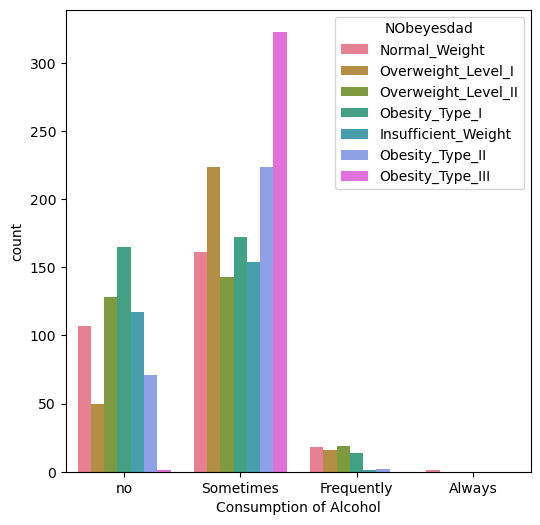

In [75]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'CALC', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Consumption of Alcohol")
plt.show()

Very few people consume alcohol always. Most people consume alcohol sometimes with most of them having Obesity Type III. 

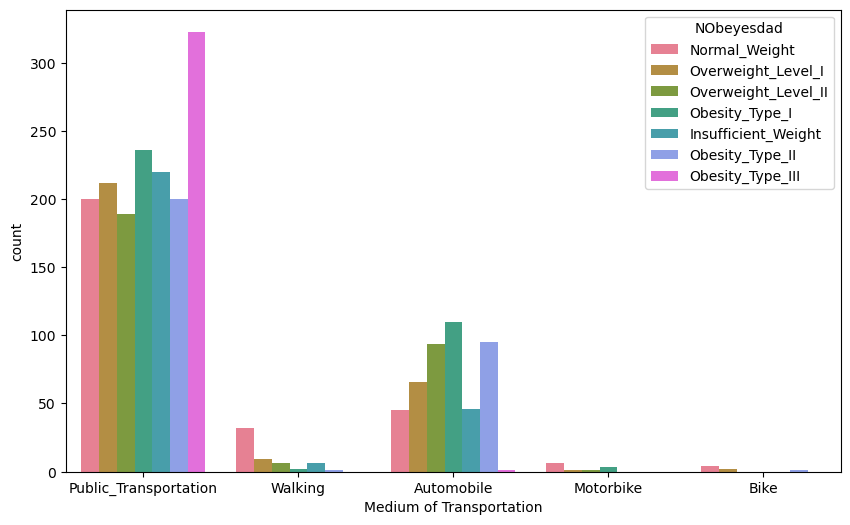

In [76]:
plt.figure(figsize = (10,6))
ax1 = sns.countplot(x = 'MTRANS', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Medium of Transportation")
plt.show()

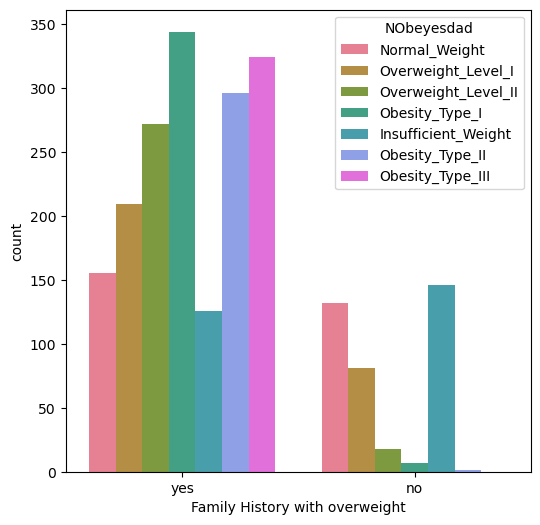

In [77]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'family_history_with_overweight', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Family History with overweight")
plt.show()

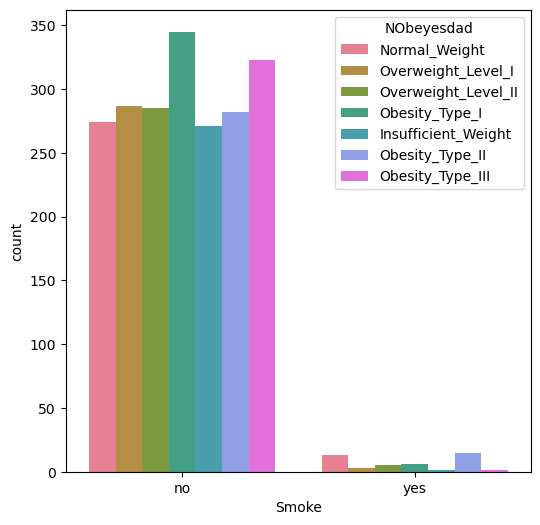

In [78]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'SMOKE', hue = 'NObeyesdad', data = data, palette = "husl")
plt.xlabel("Smoke")
plt.show()

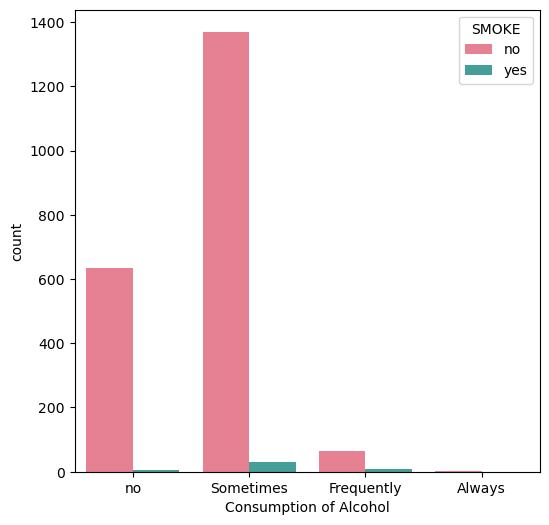

In [79]:
plt.figure(figsize = (6,6))
ax1 = sns.countplot(x = 'CALC', hue = 'SMOKE', data = data, palette = "husl")
plt.xlabel("Consumption of Alcohol")
plt.show()

In [80]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [81]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [82]:
data.shape

(2111, 17)

In [83]:
numerical_columns = data.select_dtypes('float64')
numerical_columns

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [84]:
object_fcolumns = data.select_dtypes(object).columns.drop('NObeyesdad')
object_fcolumns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [85]:
object_dummies = pd.get_dummies(data[object_fcolumns])

In [86]:
object_dummies

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2107,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2108,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2109,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [87]:
data_d = pd.concat([numerical_columns, object_dummies, data['NObeyesdad']], axis = 1)

In [88]:
data_d.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


In [89]:
data_d.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                           uint8
Gender_Male                             uint8
family_history_with_overweight_no       uint8
family_history_with_overweight_yes      uint8
FAVC_no                                 uint8
FAVC_yes                                uint8
CAEC_Always                             uint8
CAEC_Frequently                         uint8
CAEC_Sometimes                          uint8
CAEC_no                                 uint8
SMOKE_no                                uint8
SMOKE_yes                               uint8
SCC_no                                  uint8
SCC_yes                           

In [90]:
#Converting the values uint8 to float
data_dlabel = data_d['NObeyesdad']
data_dfeatures = data_d.drop(columns = 'NObeyesdad', axis = 1)
data_dfeatures.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                           uint8
Gender_Male                             uint8
family_history_with_overweight_no       uint8
family_history_with_overweight_yes      uint8
FAVC_no                                 uint8
FAVC_yes                                uint8
CAEC_Always                             uint8
CAEC_Frequently                         uint8
CAEC_Sometimes                          uint8
CAEC_no                                 uint8
SMOKE_no                                uint8
SMOKE_yes                               uint8
SCC_no                                  uint8
SCC_yes                           

In [91]:
data_dlabel

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [92]:
len(data_dlabel.unique())

7

In [93]:
data_dfeatures = data_dfeatures.astype("float")

In [94]:
data_dfeatures.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

<Axes: >

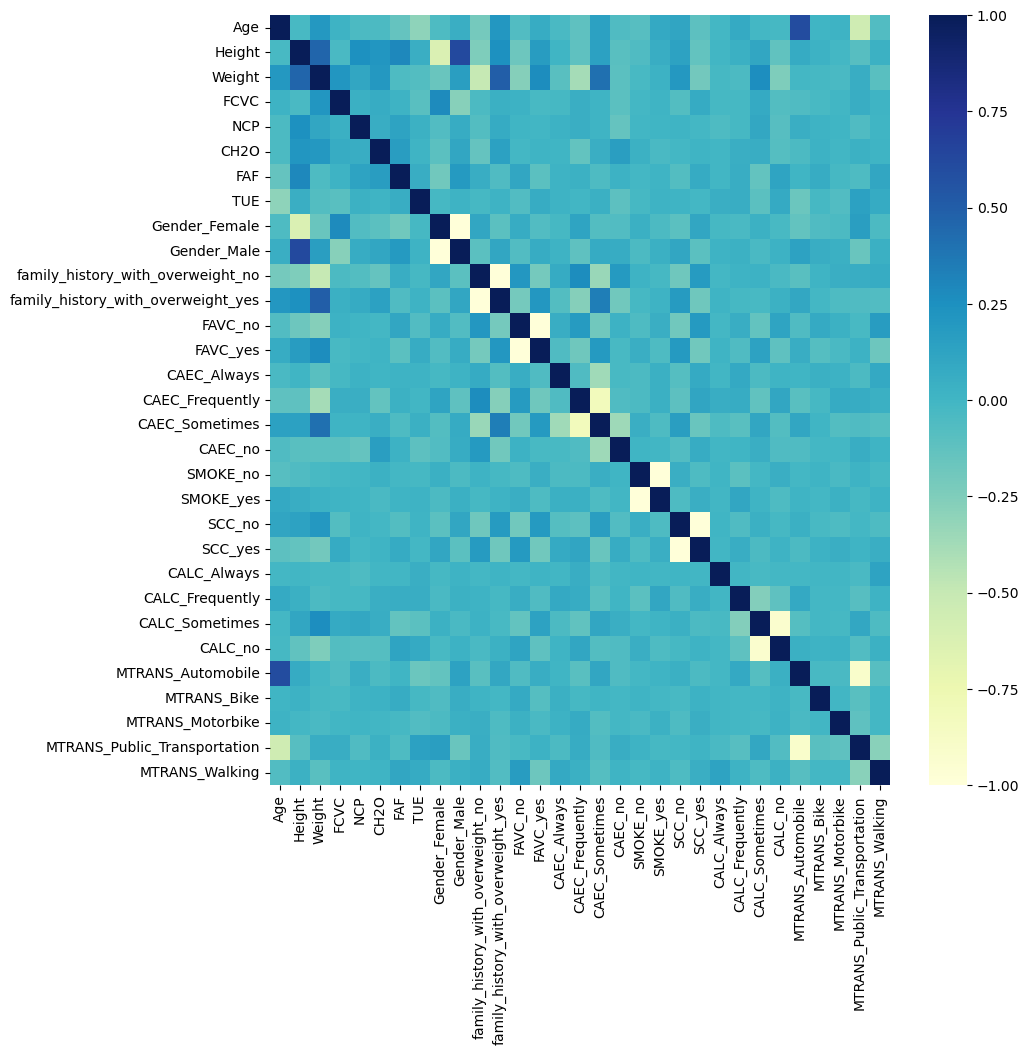

In [95]:
data_corr = data_dfeatures.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(data_corr, cmap="YlGnBu")

# Scaling the features

In [96]:
from sklearn.preprocessing import MinMaxScaler # 0 - 1

data_dfeatures_scaled = MinMaxScaler().fit_transform(data_dfeatures)

# Encoding the Labels 

In [97]:
from sklearn import preprocessing

data_dlabel_encoded = preprocessing.LabelEncoder().fit_transform(data_dlabel)

In [98]:
data_dlabel_encoded

array([1, 1, 1, ..., 4, 4, 4])

# Preparing Data 

In [99]:
X = data_dfeatures_scaled
y = data_dlabel_encoded

In [100]:
# 70% train and 30% test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import scikitplot as skplt
    
#from sklearn.preprocessing import StandardScaler # mean = 0
#from sklearn.preprocessing import MinMaxScaler # 0 - 1

# Running the models with default parameters

K neighbors | Accuracy:  0.76972
accuracy: 76.97%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        92
           1       0.62      0.48      0.54        77
           2       0.75      0.77      0.76       114
           3       0.88      0.96      0.92        85
           4       0.98      0.99      0.98        92
           5       0.72      0.65      0.68        89
           6       0.69      0.66      0.67        85

    accuracy                           0.77       634
   macro avg       0.76      0.76      0.76       634
weighted avg       0.76      0.77      0.76       634



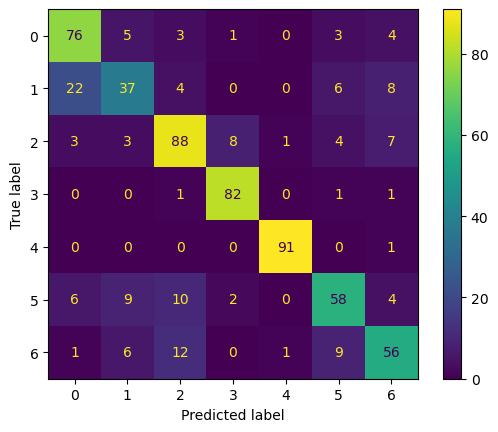

In [102]:
#K neighbors classifier
clfkn = KNeighborsClassifier().fit(X_train, y_train)
y_predKN = clfkn.predict(X_test)
kn_proba = clfkn.predict_proba(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_predKN),5)

print("K neighbors | Accuracy: ", accuracy)
print(f'accuracy: {accuracy*100:.2f}%')
        
print("\nClassification Report:\n", metrics.classification_report(y_test, y_predKN))  
        
cf = confusion_matrix(y_test, y_predKN)
cm_display = metrics.ConfusionMatrixDisplay(cf)
cm_display.plot()
plt.show()

Random Forest Classifier | Accuracy:  0.92587
accuracy: 92.59%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        92
           1       0.73      0.90      0.81        77
           2       0.99      0.92      0.95       114
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        92
           5       0.95      0.79      0.86        89
           6       0.87      0.94      0.90        85

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.92       634
weighted avg       0.93      0.93      0.93       634



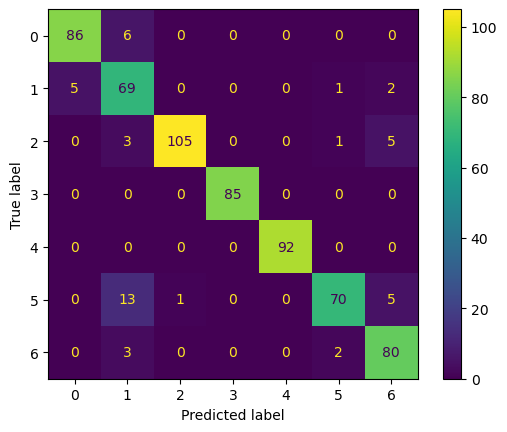

In [103]:
#Random Forest classifier
clfrf = RandomForestClassifier().fit(X_train, y_train)
y_predRT = clfrf.predict(X_test)
rt_proba = clfrf.predict_proba(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_predRT),5)
        
print("Random Forest Classifier | Accuracy: ", accuracy)
print(f'accuracy: {accuracy*100:.2f}%')
        
print("\nClassification Report:\n", metrics.classification_report(y_test, y_predRT))  
        
cf = confusion_matrix(y_test, y_predRT)
cm_display = metrics.ConfusionMatrixDisplay(cf)
cm_display.plot()
plt.show()

Light GBM | Accuracy:  0.95899
accuracy: 95.90%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.88      0.94      0.91        77
           2       0.97      0.97      0.97       114
           3       0.98      1.00      0.99        85
           4       1.00      1.00      1.00        92
           5       0.94      0.88      0.91        89
           6       0.95      0.94      0.95        85

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



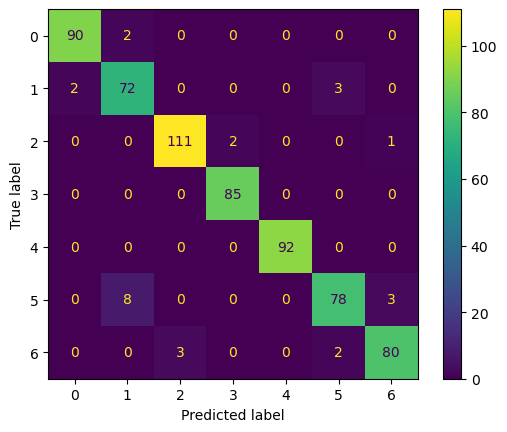

In [104]:
#Light GBM classifier
clflg = LGBMClassifier().fit(X_train, y_train)
y_predLG = clflg.predict(X_test)
lg_proba = clflg.predict_proba(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_predLG),5)
        
print("Light GBM | Accuracy: ", accuracy)
print(f'accuracy: {accuracy*100:.2f}%')
        
print("\nClassification Report:\n", metrics.classification_report(y_test, y_predLG))  
        
cf = confusion_matrix(y_test, y_predLG)
cm_display = metrics.ConfusionMatrixDisplay(cf)
cm_display.plot()
plt.show()

In [105]:
print("ROC AUC Scores for models: \n")
print("Kneighbors: ",roc_auc_score(y_test, kn_proba, multi_class = 'ovo'))
print("Random Tree: ",roc_auc_score(y_test, rt_proba, multi_class = 'ovo'))
print("Light GBM: ", roc_auc_score(y_test, lg_proba, multi_class = 'ovo'))

ROC AUC Scores for models: 

Kneighbors:  0.9331957867808762
Random Tree:  0.9929541960148505
Light GBM:  0.9971021083512377


# Feature Importance

In [106]:
def plot_feature_importance(importance,names,model_type):

    feature_importance = importance
    feature_names = names

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

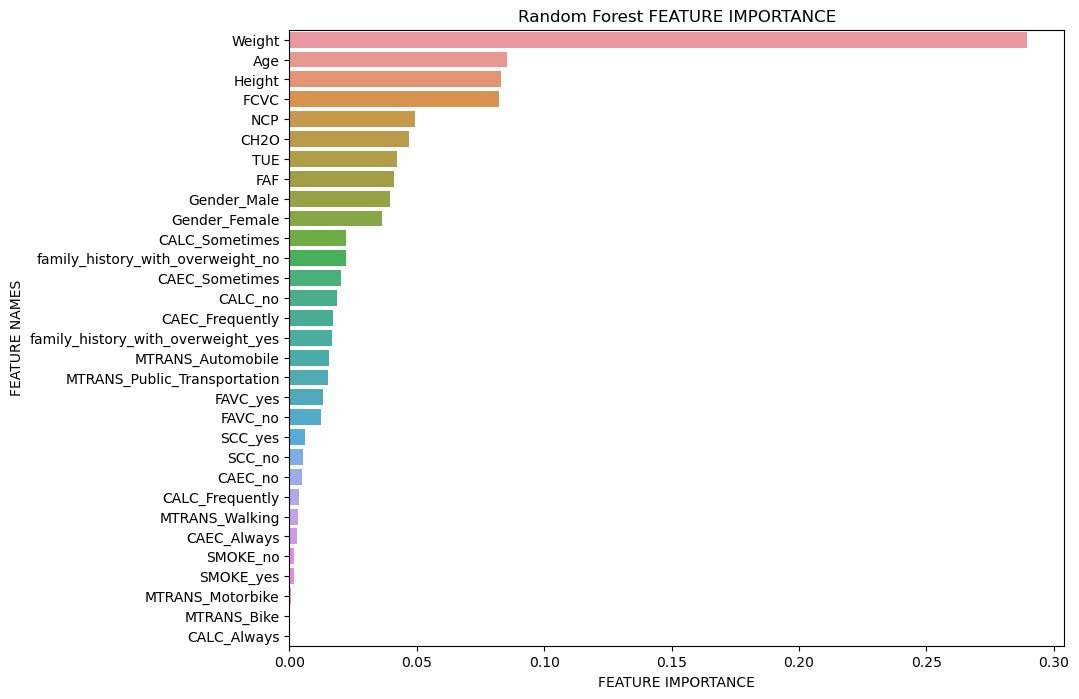

In [107]:
plot_feature_importance(clfrf.feature_importances_, data_dfeatures.columns, 'Random Forest')

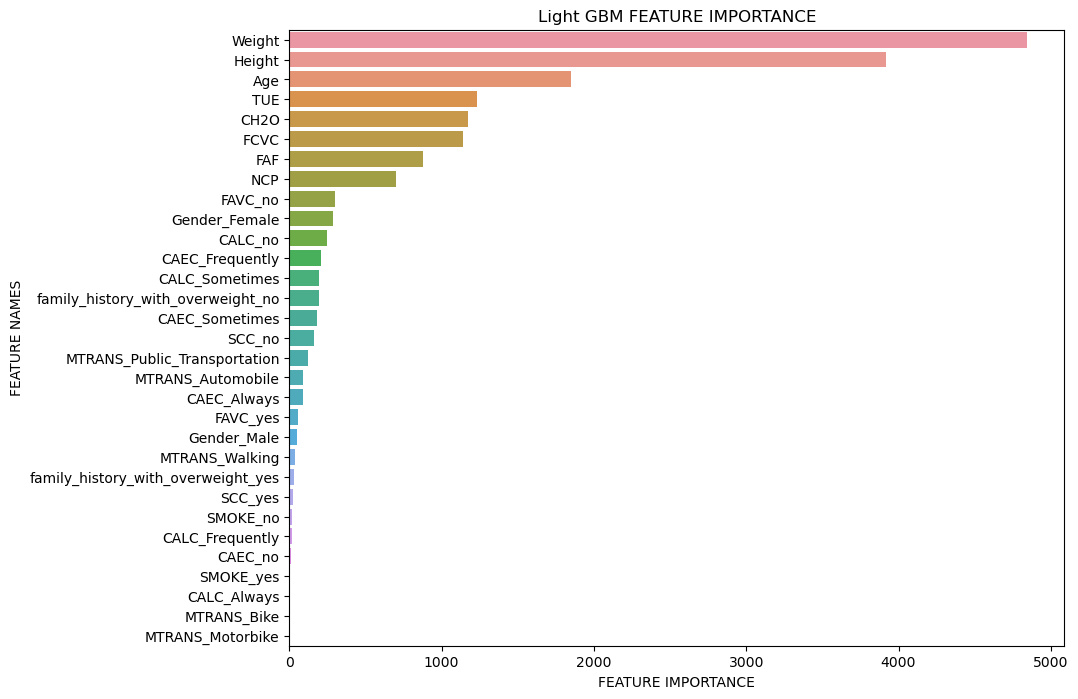

In [108]:
plot_feature_importance(clflg.feature_importances_, data_dfeatures.columns, 'Light GBM')